# Introduction
Differentiation is one of the most important operations in science.  Finding extrema of functions and determining zeros of functions are central to optimization.  Numerically solving differential equations forms a cornerstone of modern science and engineering and is intimately linked with predictive science.

A very frequent occurrence in science requires the scientist to find the zeros of a function ![equation](http://latex.codecogs.com/gif.latex?f%5Cleft%28x%5Cright%29).  The input to the function is a m- dimensional vector and the function returns an n- dimensional vector.  We denote this mathematically as ![equation](http://latex.codecogs.com/gif.latex?f%5Cleft%28x%5Cright%29): ![equation](http://latex.codecogs.com/gif.latex?%5Cmathbb%7BR%7D%5E%7Bm%7D%20%5Cmapsto%20%5Cmathbb%7BR%7D%5E%7Bn%7D).  This expression is read:  the function ![equation](http://latex.codecogs.com/gif.latex?f%5Cleft%28x%5Cright%29) maps ![equation](http://latex.codecogs.com/gif.latex?%5Cmathbb%7BR%7D%5E%7Bm%7D%20%5Cmapsto%20%5Cmathbb%7BR%7D%5E%7Bn%7D).
In CS207, we explored the finite difference method, but we also computed a symbolic derivative.  The finite difference approach is nice because it is quick and easy.  However, it suffers from accuracy and stability problems.  On the other hand, symbolic derivatives can be evaluated to machine precision, but can be costly to evaluate.
Automatic differentiation (AD) overcomes both of these deficiencies. It is less costly than symbolic differentiation while evaluating derivatives to machine precision, using the chain rule to break apart complex functions to atomic pieces. There are two primary modes of automatic differentiation: forward and reverse. In the forward mode, differentiation is carried out beginning with respect to the input variables, while the reverse begins with the output variables. In many situations where there are a disproportionate amount of possible inputs (or intermediate nodes) to outputs (often just one in the case of loss functions or model metrics), the reverse mode can be much more efficient.

This library was designed on the backend with a high-level of abstraction and ease of extensibility in mind, and with a symbolic-like simplistic interface on the frontend. This package implements both the forward and the reverse mode (with additional vectorized support for the forward mode). In addition to extensions in the reverse mode, it provides a number of visualization capabilities stemming from the need to keep track of computation, allowing users to visualize in graphs and tables any formula with any number of variables. In applying the package, we further provide some demonstrations in the applications of AD through an exploration of Newton fractals in the examples folder, demonstrating some discrepancies between finite difference methods of differentiation and AD. 


# How to Use Package
To use, first create a new virtual environment in order to develop with the package without polluting the global environment with dependencies. To do so, install virtualenv with the command `sudo easy_install virtualenv`. Next, go to the top level of your project directory and create a new virtual environment with the command `virtualenv [name]`. To activate the environment, type the command `source [name]/bin/activate`. Thus far, you have set up and activated your dev environment and can begin interacting with the AutoDiff package. To install the package, type in the command line 'pip install autodiff-jel'. You should see an output like so:

```
Collecting autodiff-jel
  Downloading https://files.pythonhosted.org/packages/30/62/6840afab118ec0b50c049703638f5fb06d79f6a876ee30439154bf2d224b/autodiff_jel-0.0.4.tar.gz
Collecting numpy (from autodiff-jel)
  Downloading https://files.pythonhosted.org/packages/74/68/2b00ba3c7390354db2a1706291750b6b7e911f6f79c0bd2184ae04f3c6fd/numpy-1.15.4-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (24.5MB)
    100% |████████████████████████████████| 24.5MB 164kB/s 
Collecting graphviz (from autodiff-jel)
  Using cached https://files.pythonhosted.org/packages/1f/e2/ef2581b5b86625657afd32030f90cf2717456c1d2b711ba074bf007c0f1a/graphviz-0.10.1-py2.py3-none-any.whl
Building wheels for collected packages: autodiff-jel
  Running setup.py bdist_wheel for autodiff-jel ... done
  Stored in directory: /root/.cache/pip/wheels/21/c5/9b/334502b015b5461601f7c69febf8be158082b3dccbe0f34cbc
Successfully built autodiff-jel
Installing collected packages: numpy, graphviz, autodiff-jel
Successfully installed autodiff-jel-0.0.4 graphviz-0.10.1 numpy-1.15.4
```

In [0]:
%%bash
pip install autodiff-jel --upgrade

  Running setup.py bdist_wheel for autodiff-jel: started
  Running setup.py bdist_wheel for autodiff-jel: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/83/79/53/88a171311313de0eae7cf978001a90b5bddd69951f6c5643b8
Successfully built autodiff-jel



Congratulations, you have installed autodiff-jel. To check that the installation was successful, run the python interpreter by typing 'python'. Import the module and do a simple operation such as printing out the name of the package like so:

In [0]:
import autodiff as AD
import numpy as np
AD.name

'autodiff_jel'


```Python
>>> import autodiff as AD
>>> import numpy as np
>>> AD.name
'autodiff_jel'
```

If your screen looks like the above, you have successfully installed `autodiff`!

Let's now go through a demo. Let us use forward mode automatic differentiation on the function sin(x).
We first need to set up the variable and the equation. By default, we are using forward mode differentiation without doing anything extra.

In [0]:
x = AD.Variable("x")
y = AD.sin(x)

Next we need to assign a value to each variable during the evaluation call.

In [0]:
y(x=np.pi)

Node(Function = 'Sine', Value = 1.2246467991473532e-16, Derivative = {'x': -1.0})

Lastly, we can now get the derivative of the function like so and specify the variable of the partial derivative:


In [0]:
print (y.derivative()["x"])

-1.0


We can create a computational graph and a table for the equation:

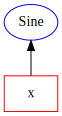

In [0]:
y.get_comp_graph()

In [0]:
y.get_comp_table()

,Trace,Elementary Function,Current Value,Grad x value
0,x_1,x,3.141593e+00,1.0
1,x_2,Sine(x_1),1.224647e-16,-1.0


Now, let's do a more advanced example with mulitple variables!

In [0]:
a = AD.Variable("a")
b = AD.Variable("b")
c = AD.Variable("c")
d = AD.Variable("d")
y = AD.cos((-a)**2/c) - 4*AD.sin(b) * AD.log(AD.exp(d) + 1, 10)
y(a = 2, b = 3, c = -1, d = 4)

Node(Function = 'Subtraction', Value = -1.638695338498409, Derivative = {'a': 3.027209981231713, 'c': 3.027209981231713, 'd': -0.24074123364509895, 'b': 6.910386575432481})

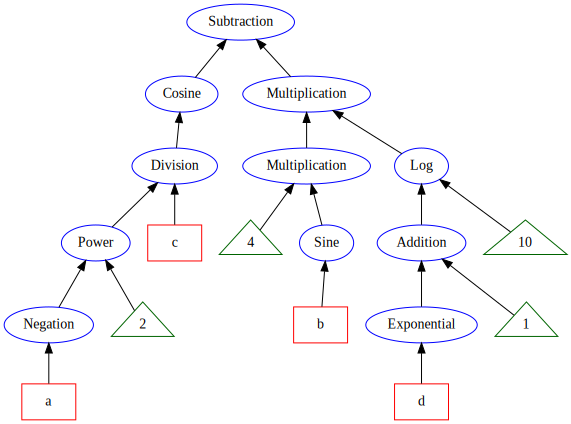

In [0]:
y.get_comp_graph()

In [0]:
y.get_comp_table()

,Trace,Elementary Function,Current Value,Grad a value,Grad c value,Grad b value,Grad d value
0,x_1,a,2.000000,1.00,0.00,0.00,0.00
1,x_2,b,3.000000,0.00,0.00,1.00,0.00
2,x_3,c,-1.000000,0.00,1.00,0.00,0.00
3,x_4,d,4.000000,0.00,0.00,0.00,1.00
4,x_5,Negation(x_1),-2.000000,0.00,0.00,0.00,0.00
5,x_6,"Power(x_5,x_1)",4.000000,0.00,0.00,0.00,0.00
6,x_7,2,2.000000,0.00,0.00,0.00,0.00
7,x_8,"Division(x_6,x_3)",-4.000000,-4.00,-0.00,0.00,0.00
8,x_9,Cosine(x_8),-0.653644,3.03,0.00,0.00,0.00
9,x_10,Sine(x_2),0.141120,0.00,0.00,-0.99,0.00


Checkout `visualization_examples.ipynb` file under examples folder for more details on visualization.

Now, let's do the same example using reverse mode differentiation. First we need to set the differentiation mode to reverse:

In [0]:
AD.settings.set_mode("reverse")

AttributeError: ignored

Next, we do the same as before and create a variable and set up a function. Then we assign a value to x and voila!

In [0]:
x = AD.Variable("x")
y = AD.sin(x)
y(x=np.pi)

Node(Function = 'Sine', Value = 1.2246467991473532e-16, Derivative = {'x': -1.0})

Congratulations, you can now begin automatically differentiating away! 

# Background

The basic principles behind automatic differentiation rely on calculating the derivative of a function by splitting the calculation into a number of parts, and can be approached using a number of equivalent methodologies. The simplest illustration of the forward mode of AD is taking the chain rule and treating a tricky function as a composite function of a series of elementary operations. The product of each derivative, building up through each of the elementary functions, gives a computationally simple and accurate method for evaluating difficult derivatives.

For functions that map ![equation](http://latex.codecogs.com/gif.latex?R%5Em) to ![equation](http://latex.codecogs.com/gif.latex?R%5En), we can see that this method of computing the derivative is equivalent to computing the Jacobian. This can be computationally illustrated through:

![equation](http://latex.codecogs.com/gif.latex?D_%7Bp%7Dx%20%3D%20%5Csum_%7Bj%3D1%7D%5E%7Bm%7D%7B%5Cdfrac%7B%5Cpartial%20x%7D%7B%5Cpartial%20x_%7Bj%7D%7Dp_%7Bj%7D%7D)

where we take x as our m-dimensional input vector, and ![equation](http://latex.codecogs.com/gif.latex?p) as a seed vector that is all 0's except for a 1 at the dimension we desire to compute for the Jacobian, thus filling in each of the entries.

Finally, for the implementation in our software package, we take advantage of the construction of dual numbers, which is an algebra with the following construction:

Given any number x, rewrite it as: ![equation](http://latex.codecogs.com/gif.latex?x%20%3D%20x&plus;%5Cepsilon%20x%27), where ![equation](http://latex.codecogs.com/gif.latex?%5Cepsilon) has the property such that ![equation](http://latex.codecogs.com/gif.latex?%5Cepsilon%5E2%20%3D%200). This construction is extremely useful because it enables the automatic computation of derivatives, provided the initial derivative at any given x upon instantiation, simply by expanding the formula and computing algebraically the equivalent dual number solution. For the purposes of our implementation of the forward mode of automatic differentiation, we will use dual numbers to compute the appropriate derivatives at each step. 

One of the new features in this package is a method that enables the user to visualize the forward propogation of derivatives in forward mode differentiation. The user will be able to visualize graphically how the derivative of the whole function is calculated from the individual components. The visualization comes in the form of a directed acyclic graph, a DAG, and will provide a means to see the propogation of the derivatives from inner function components all the way out. 

In addition, this library also includes an alternative form of differentiation: reverse mode differentiation. Reverse mode differentiation is a much more efficient method of computing derivatives as compared to forward mode and is a great addition for users concerned with the time complexity of code. This package supports use of reverse mode differentiation for scalar operations.

Lastly, another new feature in this package is the ability to visualize Newton fractals. The Newton-Raphson iteration method successively outputs better approximations of the roots of a function through use of the function itself and its derivatives. The method intakes a function *f(x)*, its derivative *f'(x)*, and an approximation of the root a and continually calculates *a′=a−f(a)/f′(a)*, where a' is a better approximation of the root than a. One typically iterates over and over again until the approximations converge, signalling that a really good approximation r has been found where *f(r) = 0*. This method works for roots in both the complex and real planes. Newton fractals build on these approximations and are a visualization of which root each starting root approximation *a* converges to. As one can expect, when beginning approximations are pretty good approximations of a certain root, it will converge to that root. Something interesting happens during when the approximation is a really bad one and it is precisely this that generates the fractals in Newton fractals. These really bad approximations are essentially so bad that the whole surrounding area is essentially unstable and does not converge to one root as a whole. This behavior gives us these beautiful fractals. (https://www.chiark.greenend.org.uk/~sgtatham/newton/ [link text](https://www.chiark.greenend.org.uk/~sgtatham/newton/))




# Software Organization

Our directory will look like:
```
cs207-Finalproject\
  autodiff\
    __init__.py
    node.py
    operators.py
    settings.py
    visualization.py
  documentation\
    documentation.ipynb
    milestone1.md
    milestone2.md
  examples\
    fractals.py
    visualization_examples.ipynb
    fractals_examples.ipynb
  tests\
    test_node.py
    test_operators.py
    test_visualization.py
  .coverage
  .gitignore
  .travis.yml
  LICENSE
  setup.cfg
  setup.py
  README.md
  requirements.txt
```

The key modules and their basic functionalities are:
* node.py: Defines the core structure of forward automatic differentiation. This includes operator overloading.
* operators.py: Defines operators that can be applied to nodes.
* visualization.py: Visualizes the computational graph or table for forward automatic differentation.
* settings.py: Sets the differentiation mode between forward and backward.
* fractals.py: Implements and visualizes Newton fractals.

The test suite will live in the `tests/` directory, which we will be maintain by using  TravisCI for continuous integration and Coveralls for verifying test coverage. The package will be distributed through PyPI.

# How to Use AutoDiff

The user will obtain our package through PyPI. The user will first install the package then import it into their project file.
Example use:

```Python
from autodiff import Variable, sin, cos, log, exp

a = Variable("a")
b = Variable("b")
c = Variable("c")
d = Variable("d")
y = cos((-a)**2/c) - 4*sin(b) * log(exp(d) + 1, 10)

y(a = 2, b = 3, c = -1, d = 4)

print(round(y.value(),2))
-1.64

print(round(y.derivative()["a"], 2))
3.03

print(y)
Node(Function = 'Subtraction', Value = -1.638695338498409, Derivative = {'b': 6.910386575432481, 'd': -0.24074123364509895, 'c': 3.027209981231713, 'a': 3.027209981231713})
```

The user can instantiate multiple nodes and apply any operators outlined in the `Operators` module. The value and the gradients of the node can be accessed by using the `value` and `derivative` methods respectively. Our implementation is meant to be as intuitive as possible, allowing natural manipulation of formula expressions through extensive use of python magic methods, and built in functions for handling the most common math functions. In addition, every node saves its values upon computation at any given point, allowing for more extensive analysis at different points and the capability of implementing a visualization module.


# Implementation
Our implementation centers around the use of the class `Node`, which is an abstract class defining a single operation. Nodes may be `Constant`s and `Variable`s, which are reflexive functions that simply return their value. Every node is equivalently a dual number store, as it contains both the real value part, and the dual differentiated part at that point in the graph. Nodes are built upon one another by the `children` attribute, which contain all the lower-level nodes that are involved in the computation of the current node. This implementation seeks to elegantly reconstruct the basis of automatic differentiation, the computational graph and table, in implementing both the forward and reverse modes, and thus necessitates the storage of the derivative values as they are propagated through the graph.


## What are the core data structures?
The core data structures are `Variable`s, which are symbolic at initialization, and are given a value at computation. Computation is invoked by calling any node directly with either a dictionary or a direct keyword list, where the keys to both are simply the names of the variables at instantiation. The variables needed for any given node are only those which are involved directly in the computation up until that node, meaning the recursive list of all variables involved in that node's children. When computation is called, both the values, and the partial derivatives (for every variable involved), are propagated from the Variables to the node from which computation is called, for the forward mode. The data is stored automatically through use of a decorator factory that makes defining any new operations extremely simple, and pain-free by requiring only numerical computation in subclass implementations of new functions, and no handling of the internals of our implementation.


## What classes will you implement
We implement the base Node class representing a function, which necessitates subclassing and specifically the overriding of the `eval` and `diff` methods. These methods, when combined with the provided `node_decorator`, will automatically pass `(values)` and `(values, diffs)` to `eval` and `diff` respectively, which are lists of the values and immediate derivatives of all children nodes. This means that any user-subclassed custom functions will only need to numerically handle the value computation and dual-number based derivative computation and return that output, and the rest of the implementation will work. Furthermore, we use a seed-based derivative system where partials are computed one at a time (essentially passing all requisite variables a one-hot kind of vector in their derivatives to compute one partial), meaning that implementations of the derivative can remain univariate in output, simplifying computation.


## What method and name attributes will your classes have?

`Node`

The Node class is the core structure. It is the basis of all classes in `Operators` module. Below are the method and name attributes of the `Node` class.

```
class Node:
  Attributes:
    _value: Value at the current node; holds values for the most recent computation
    _derivative: Derivative/Gradients of the node in dictionary form
    _variables: All variables involved in the computation of this node
    _cur_var: Marker for determining the current partial being computed when iterating through all seed values (in computing full Jacobian)
    children: A list of all children nodes which are involved in this computation
    type: String describing the type of computation or node this is
  Methods:
    ### Class methods ###
    @classmethod
    make_constant(cls, value): Class method for constructing a Constant node

    @classmethod
    make_node(cls, node, *values): Important class method that takes in a new Node instance, and properly instantiates it with children from the unpacked values argument list (which can include both numeric values and nodes)

    ### Magic Methods ###
    __call__(self): Convenience wrapper for calling the compute function, which computes the node value and derivatives at given point
    __repr__(self): Representation of node with values, derivatives, and type of function
    __add__(self, value): Constructs an Addition node
    __radd__(self, value): ^
    __neg__(self): Constructs a Negation node
    __sub__(self, value): Constructs a Subtraction node
    __rsub__(self, value): ^
    __mul__(self, value): Constructs a Multiplication node
    __rmul__(self, value): ^
    __truediv__(self, value): Constructs a Division node
    __rtruediv__(self, value): ^
    __pow__(self, value): Constructs a Power node
    __rpow__(self, value): ^
    __eq__(self, value): Returns true if nodes have the same values and derivatives
    __ne__(self, value): Returns not __eq__(self, value)
    __hash__(self): Returns unique identification number for each Node for hashing

    ### Attribute Methods ###
    value(self): Function for returning the value at the current node
    derivative(self): Function for returning the derivatives at the current node
    set_value(self, value): Set a value
    set_derivative(self, value): Set a derivative
    set_children(self, *children): Give current node children

    ### Variable Methods ###
    update_variables(self): Called when constructing a new node. This computes the minimal set of variables involved among the children, and sets the current node's variables reference appropriately
    set_variables(self, input_dict): Called at computation, and sets all variables to the given values defined by input_dict. Note that the same minimal set of variables is referenced by all nodes that use it, so this function can be called from anywhere further in the computational graph
    zero_vector_derivative: [TODO]
    update_cur_var(self): Find the current partial by looking at which variable has been seeded properly. This is necessary as a way to let other nodes not directly calling the compute method what variable the current partial is with regard to.
    iterate_seeds(self): A generator that is responsible for iterating among all partials necessary at the current node to find the full gradient

    ### Computation Methods ###
    compute(self, *args, **kwargs): Method that initates the full computation through all children by taking in either an input dictionary (such as {'x': 4, 'y': 3}), or keyword pairs (such as (x=4, y=3)) with the variables referenced by the name they were instantiated with. Returns self once all values are updated.
    eval(self, values): A method to be overriden by subclasses, which will implement the actual calculation of the value itself by the function this node is responsible for. Usage of the decorator node_decorate greatly simplifies this implementation, see specifics below
    diff(self, values, diffs): Like eval, to be overriden and implemented with the dual-number solution to the derivative of the current function.
    get_comp_graph(self): Creates a computational graph for a given node.
    get_comp_table(self): Creates a computational table for a given node.

class node_decorate:
  This is a decorator implemented as a class (can be implemented as a function, but less elegant) that serves as a decorator factory for methods that need to be overrided: eval, and diff. This class allows all subclasses of Node to only worry about implementing a purely numerical method for computation of values and derivatives, and will handle all the logistics necessary to both save those values at each point in the graph automatically, and properly expose and propagate data as necessary to the function.

class Variable:
  Subclass of Node that implements a simple Variable. Basis of all computation in forward-mode.
class Constant:
  Convenience class constructed automatically when a constant shows up in computation.
class Addition, Subtraction ...
  Subclasses of Node that implement elementary functions.
```

`Operators`

Classes here contain additional Node types that define common operations such as sin, log, exp, etc. These also contain the constructor for these nodes - recall that Node is simply the symbolic representation of a function in the graph, and not an actual computation directly initializable by the user. For that, a more familiar and intuitive approach is provided by the built in functions (denoted with lowercase letters) sin, log, exp, etc. that will take in either numeric values or nodes, and output the appropriate respective Sin, Log, Exp nodes.


## What external dependencies will you rely on?

We rely mostly on numpy for efficient computation; other requirements are needed for some of the extension features of this library. For forward mode visualization, we require graphviz and pandas.

We will specifically leverage [matrix operations](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.html) and [universal functions](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html) from `Numpy`, [Digraph](https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html) from graphviz and [Dataframe](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html) from pandas. 


## How will you deal with elementary functions like sin and exp?

Elementary functions including trigonometric functions, logarithmic functions, and exponential functions, will be accounted for in `Operators.py`, which are subclasses of `Node`. These will be naturally handled and can be user overriden by direct import, so that they can use intuitive expressions like `sin(x+y/4)`

# Future

In the future, we can add vector support for reverse mode differentiation. This addition would make our differentiation model truly complete with support for scalar and vector operations in both modes of differentiation. In addition, we could also provide further support for trigonometric functions by including secant, cosecant, and cotangent functions. In addition to the purely mathematical additions to the library, we could also add more extensions for applications of automatic differentiation. One extension could be to add support to minimize or maximize equations given a set of constraints. Such optimization problems come in many forms and in many fields, from artificial intelligence to [topology optimization](https://caeai.com/blog/what-topology-optimization-and-why-use-it), which aims to find the best distribution of a material given a set of contraints and optimization goal. Providing support for optimization problems will open this library up to many different use cases.